In [3]:
import numpy as np
# T-검정에 사용되는 라이브러리 stats
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### exe-1) 학생 키에 대한 두 집단 비교

In [4]:
## 데이터 생성하기
# 최소값 157, 최대값 178 범위 중 sixe 20개 생성
group1Heights = np.random.randint(low=157, high=178, size = 20)
print('group1Heights =',group1Heights)
group2Heights = np.random.randint(low=162, high=182, size = 20)
print('group2Heights =', group2Heights)

group1Heights = [172 165 165 166 157 160 160 163 164 162 169 167 176 176 175 171 162 174
 167 163]
group2Heights = [166 162 162 167 168 165 176 167 181 179 171 172 175 162 178 174 164 175
 172 163]


In [5]:
# 검증하기
# stats.ttest_ind(기준집단, 관측집단) / independent Samples t-test -> 독립된 두 집단 사용 시
tResult = stats.ttest_ind(group1Heights, group2Heights)
print('한 집단 평균 검정 (단일 표본검정) =', tResult)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(tResult))

# (해석)
# 1. p-value = 0.091 >= 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두개의 집단간 평균의 차이는 없다.

한 집단 평균 검정 (단일 표본검정) = Ttest_indResult(statistic=-1.7351445112411523, pvalue=0.09082007675567844)
t-검정 통계량 = -1.735, p-value = 0.091


### exe-2) 남녀 두 집단 간 파이썬 시험 평균검정차이
#### -  귀무가설 : 남녀 두 집단 간 파이썬 시험의 평균에 차이가 없다
#### -  대립가설 : 남녀 두 집단 간 파이썬 시험의 평균에 차이가 있다.

In [6]:
### 데이터 생성
male = [75,85,100,72.5,86.5]
female = [63.2,76,52,100,70]

In [7]:
result = stats.ttest_ind(male, female)
print('한 집단 평균 검정 (단일 표본검정) =', result)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(result))

# (해석)
# 1. p-value = 0.253 >= 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두개의 집단간 평균의 차이는 없다.

한 집단 평균 검정 (단일 표본검정) = Ttest_indResult(statistic=1.233193127514512, pvalue=0.2525076844853278)
t-검정 통계량 = 1.233, p-value = 0.253


### exe-3) 두가지 교육방법에 따른 평균학점에 대한 차이 검정수행
#### - 귀무가설 : 두 교육방법에 따른 평균학점에는 차이가 없다
#### - 대립가설 : 두 교육방법에 따른 평균학점에는 차이가 있다

In [51]:
# 데이터 가져오기 : two_sample.csv
m = pd.read_csv('./data/two_sample.csv')

# 교육방법 1과 2 추출
# 교육방법 1에 대한 데이터 변수 : m1 변수에 저장
m1= m[m['교육방법']==1]
# 교육방법 2에 대한 데이터 변수 : m2 변수에 저장
m2= m[m['교육방법']==2].reset_index(drop=True)

# 교육방법 1에 대한 학점만 추출한 데이터 변수 : scor1 변수에 저장
scor1 = m1['학점']
# # 교육방법 2에 대한 학점만 추출한 데이터 변수 : scor2 변수에 저장
scor2 = m2['학점']

# 결측치 처리 : 결측치는 평균으로 처리
scor1 = scor1.fillna(scor1.mean())
scor2 = scor2.fillna(scor2.mean())

print(scor1)
print(scor2)

In [59]:
# 정규성 검사
result = stats.shapiro(scor1)
print('정규성 검정 결과 =', result)
print('검정 통계량 = %.3f, p-value = %.3f' %(result))
# (해석)
# - p-value = 0.803 > 0.05 이므로, 정규성을 만족.

result2 = stats.shapiro(scor2)
print('정규성 검정 결과 =', result2)
print('검정 통계량 = %.3f, p-value = %.3f' %(result2))
# (해석)
# - p-value = 0.336 > 0.05 이므로, 정규성을 만족.

정규성 검정 결과 = ShapiroResult(statistic=0.9615016579627991, pvalue=0.8028513789176941)
검정 통계량 = 0.962, p-value = 0.803
정규성 검정 결과 = ShapiroResult(statistic=0.9173869490623474, pvalue=0.3356756865978241)
검정 통계량 = 0.917, p-value = 0.336


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


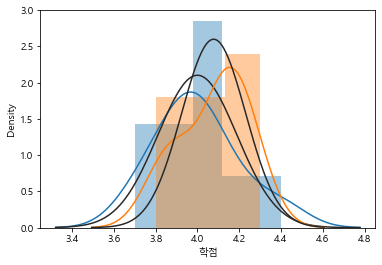

In [63]:
# 정규분포 시각화 2개 같이 그림
plt.rc('font', family = 'Malgun Gothic', size = 10)

# stats.norm : 정규분포 표시
sns.distplot(scor1, fit=stats.norm) # 파란색
sns.distplot(scor2, fit=stats.norm) # 주황색

plt.show()

In [61]:
# # 정규분포 시각화
# plt.rc('font', family = 'Malgun Gothic', size = 10)

# # stats.norm : 정규분포 표시
# plt.show()

In [71]:
### 등분산성 검즘
# 데이터 2개 사용시 확인
# - 귀무가설 : 두 집간간 분산이 동일하다 (p-value > 0.05)
# - 대립가설 : 두 집간간 분산이 동일하지 않다

# 등분산성 검증은 3갸지 방법으로 진행
# 1. levene(레빈) 방법
# 2. fligner(필리그너) 방법
# 3. bartlett(바틀렛) 방법

sLevene= stats.levene(scor1, scor2)
print('등분산성 levene 검증결과 =', sLevene)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sLevene))
print()
# (해석)
# 1. p-value = 0.742 >= 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족.


sFligner= stats.fligner(scor1, scor2)
print('등분산성 fligner 검증결과 =', sFligner)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sFligner))
print()
# (해석)
# 1. p-value = 0.923 >= 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족.


sBartlett= stats.bartlett(scor1, scor2)
print('등분산성 bartlett 검증결과 =', sBartlett)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sBartlett))
print()
# (해석)
# 1. p-value = 0.537 >= 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족.

등분산성 levene 검증결과 = LeveneResult(statistic=0.11149825783972156, pvalue=0.7423035272233627)
t-검정 통계량 = 0.111, p-value = 0.742

등분산성 fligner 검증결과 = FlignerResult(statistic=0.009351524793910174, pvalue=0.9229620332079382)
t-검정 통계량 = 0.009, p-value = 0.923

등분산성 bartlett 검증결과 = BartlettResult(statistic=0.38065029633127184, pvalue=0.5372554141124455)
t-검정 통계량 = 0.381, p-value = 0.537



In [55]:
# 검증하기
result3 = stats.ttest_ind(scor1, scor2)
print('한 집단 평균 검정 (단일 표본검정) =', result3)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(result3))

# (해석)
# 1. p-value = 0.352 >= 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 교육방법에 따른 평균학점에는 차이가 없다

한 집단 평균 검정 (단일 표본검정) = Ttest_indResult(statistic=-0.9561271382392642, pvalue=0.3516741458629946)
t-검정 통계량 = -0.956, p-value = 0.352


In [72]:
# 검증하기

# equal_var : 정규성과 등분산성 모두를 만족하는 경우 작성
result3 = stats.ttest_ind(scor1, scor2, equal_var=True)
print('한 집단 평균 검정 (단일 표본검정) =', result3)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(result3))

# (해석)
# 1. p-value = 0.352 >= 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 교육방법에 따른 평균학점에는 차이가 없다

한 집단 평균 검정 (단일 표본검정) = Ttest_indResult(statistic=-0.9561271382392642, pvalue=0.3516741458629946)
t-검정 통계량 = -0.956, p-value = 0.352


### exe-4) 어느 음식점의 매출자료와 날씨자료를 이용하여
#### ........... 강수 여부에 따른 매출의 차이에 대해 분석
##### 집단 1 : 비가 올때의 매출
##### 집단 1 : 비가 안올때의 매출
##### -귀무가설 : 강수여부에 따른 매출액 평균에 차이가 있다
##### -대립가설 : 강수여부에 따른 매출액 평균에 차이가 없다

In [73]:
# 사용 라이브러리
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# 매출 데이터 : tsales.csv
# - YMD : 날짜, AMT : 매출, CNT : 매출건수
tsales =  pd.read_csv('./data/tsales.csv') # pd.read_csv('./data/tsales.csv', dtype={'YDM' : 'object'}) 가져오면서 형태 바꿈

# 날짜 데이터 : tweather.csv
# - tm : 날짜, sumRn : 강수량
weather = pd.read_csv('./data/tweather.csv')

In [ ]:
# 날짜(object 형태)에 있는 '-' 삭제
"""
weather['tm'] = weather['tm'].str.replace('-','')
"""

In [123]:
tsales['YMD'] = pd.to_datetime(tsales['YMD'])
weather['tm'] = pd.to_datetime(weather['tm'])

In [127]:
weather

,stnId,tm,avgTa,minTa,maxTa,sumRn,maxWs,avgWs,ddMes
0,108,2018-06-01,23.8,17.5,30.2,0.0,4.3,1.9,0.0
1,108,2018-06-02,23.4,17.6,30.1,0.0,4.5,2.0,0.0
2,108,2018-06-03,24.0,16.9,30.8,0.0,4.2,1.6,0.0
3,108,2018-06-04,22.6,18.9,27.5,0.0,4.4,1.9,0.0
4,108,2018-06-05,23.7,17.7,29.2,0.0,4.0,1.7,0.0
...,...,...,...,...,...,...,...,...,...
697,108,2020-04-28,13.9,7.8,19.9,0.0,5.5,3.0,0.0
698,108,2020-04-29,14.9,9.3,21.0,0.0,5.2,2.6,0.0
699,108,2020-04-30,17.1,9.3,23.4,0.0,5.9,2.7,0.0
700,108,2020-05-01,20.2,16.4,26.2,0.0,5.5,2.7,0.0


In [163]:
data = pd.merge(tsales, weather, left_on = 'YMD', right_on='tm')
# pd.merge(tsales, weather, how = 'left', left_on = 'YMD', right_on='tm')
data = data[['YMD','AMT','sumRn']]

In [166]:
# 비 안올때
data1 = data[data['sumRn'] == 0]
data1

# 강사님
# rainN = df[(df["rain_yn"]==0)]["AMT"]
# rainN.reset_index(drop=True)

,YMD,AMT,sumRn
0,2019-05-14,0,0.0
2,2019-05-21,50000,0.0
3,2019-05-22,125000,0.0
4,2019-05-23,222500,0.0
5,2019-05-24,209000,0.0
...,...,...,...
323,2020-04-24,1092500,0.0
324,2020-04-25,672500,0.0
325,2020-04-26,1123500,0.0
326,2020-04-27,819500,0.0


In [167]:
# 비올때
data2 = data[data['sumRn'] > 0]
data2

# 강사님
# data['rain_yn'] = (data['sumRn'] > 0).astype(int)
# rainY = data[(data['rain_yn'] == 1)]['AMT']
# rainY.reset_index(drop=True)

,YMD,AMT,sumRn
1,2019-05-19,18000,22.0
8,2019-05-27,274000,7.1
18,2019-06-06,318000,7.5
19,2019-06-07,139500,35.3
21,2019-06-09,482500,2.5
...,...,...,...
282,2020-03-13,933000,0.5
295,2020-03-26,700000,1.8
296,2020-03-27,760500,2.0
318,2020-04-19,908000,10.3


In [175]:
# 비안올 때 정규성 검사
result = stats.shapiro(data1['AMT'])
print('한 집단 평균 검정 (단일 표본검정) =', result)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(result))
print()

# (해석)
# - p-value = 0.056 > 0.05 이므로, 정규성을 만족

# 비올때 정규성 검사
result = stats.shapiro(data2['AMT'])
print('한 집단 평균 검정 (단일 표본검정) =', result)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(result))

# (해석)
# - p-value = 0.883 > 0.05 이므로, 정규성을 만족

한 집단 평균 검정 (단일 표본검정) = ShapiroResult(statistic=0.9884955883026123, pvalue=0.056049469858407974)
t-검정 통계량 = 0.988, p-value = 0.056

한 집단 평균 검정 (단일 표본검정) = ShapiroResult(statistic=0.9924222826957703, pvalue=0.882739782333374)
t-검정 통계량 = 0.992, p-value = 0.883


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


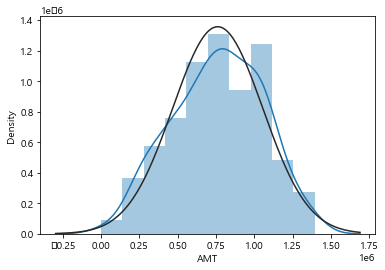

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT', ylabel='Density'>

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


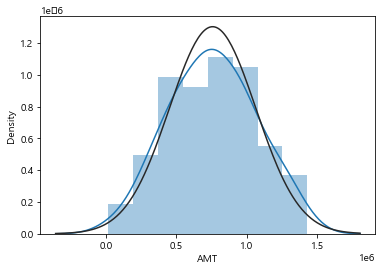

In [176]:
# 정규분포 시각화
plt.rc('font', family = 'Malgun Gothic', size = 10)

# stats.norm : 정규분포 표시
sns.distplot(data1['AMT'], fit=stats.norm)
plt.show()
sns.distplot(data2['AMT'], fit=stats.norm)

In [177]:
### 등분산성 검즘

sLevene= stats.levene(data1['AMT'], data2['AMT'])
print('등분산성 levene 검증결과 =', sLevene)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sLevene))
print()
# (해석)
# 1. p-value = 0.712 >= 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족.


sFligner= stats.fligner(data1['AMT'], data2['AMT'])
print('등분산성 fligner 검증결과 =', sFligner)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sFligner))
print()
# (해석)
# 1. p-value = 0.705 >= 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족.


sBartlett= stats.bartlett(data1['AMT'], data2['AMT'])
print('등분산성 bartlett 검증결과 =', sBartlett)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sBartlett))
print()
# (해석)
# 1. p-value = 0.604 >= 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족.

등분산성 levene 검증결과 = LeveneResult(statistic=0.13618283405945808, pvalue=0.7123452333011173)
t-검정 통계량 = 0.136, p-value = 0.712

등분산성 fligner 검증결과 = FlignerResult(statistic=0.14330809936064023, pvalue=0.705014212806607)
t-검정 통계량 = 0.143, p-value = 0.705

등분산성 bartlett 검증결과 = BartlettResult(statistic=0.2688957613342281, pvalue=0.6040734684690022)
t-검정 통계량 = 0.269, p-value = 0.604



In [178]:
# 검증하기

# equal_var : 정규성과 등분산성 모두를 만족하는 경우 작성
result = stats.ttest_ind(data1['AMT'], data2['AMT'], equal_var=True)
print('한 집단 평균 검정 (단일 표본검정) =', result)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(result))

# (해석)
# 1. p-value = 0.920 >= 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 교육방법에 따른 평균학점에는 차이가 없다

한 집단 평균 검정 (단일 표본검정) = Ttest_indResult(statistic=0.10109828602924716, pvalue=0.919534587722196)
t-검정 통계량 = 0.101, p-value = 0.920
